# Visualise the results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from anomaly_delays.main_functions import share_delays
from anomaly_delays.helper_functions import read_nab, calc_cum_avg_loss

In [2]:
scores = pd.read_csv("results/scores.csv")
losses_log = pd.read_csv("results/losses_log.csv")
losses_square = pd.read_csv("results/losses_square.csv")

## Predictions for the real data with known anomaly causes

In [3]:
scores_real = scores[scores["folder_name"] == "realKnownCause"]
files = [
    "_ec2_request_latency_system_failure.csv",
    "_machine_temperature_system_failure.csv",
    "_ambient_temperature_system_failure.csv",
]

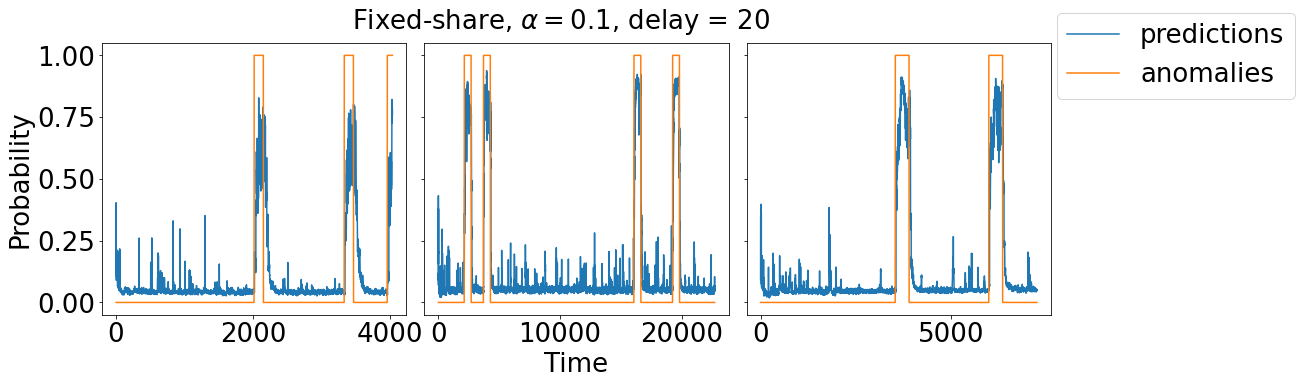

In [4]:
fig, axs = plt.subplots(1, len(files), figsize=(17, 5))
for i, _ in enumerate(files):
    axs[i].plot(
        scores_real[scores_real["file_name"] == files[i]][
            "score_Fixed10d1"
        ].values,
        label="predictions",
    )
    axs[i].plot(
        scores_real[scores_real["file_name"] == files[i]]["label"].values,
        label="anomalies",
    )
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=0
)
for n, ax in enumerate(axs.flat):
    if n == 1:
        ax.set_xlabel("Time", fontsize=26)
    ax.set_ylabel("Probability", fontsize=26)
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(labelsize=26)
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels, loc="upper right", bbox_to_anchor=(1.11, 1), fontsize=26
)
fig.suptitle(r"Fixed-share, $\alpha = 0.1$, delay = 20", fontsize=26);

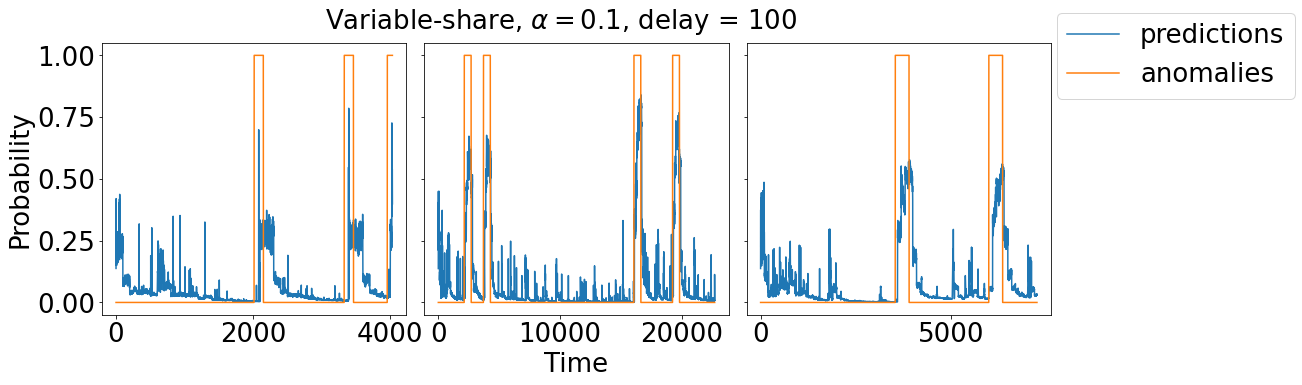

In [5]:
fig, axs = plt.subplots(1, len(files), figsize=(17, 5))
for i, _ in enumerate(files):
    axs[i].plot(
        scores_real[scores_real["file_name"] == files[i]][
            "score_Variable10d3"
        ].values,
        label="predictions",
    )
    axs[i].plot(
        scores_real[scores_real["file_name"] == files[i]]["label"].values,
        label="anomalies",
    )
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=0
)
for n, ax in enumerate(axs.flat):
    if n == 1:
        ax.set_xlabel("Time", fontsize=26)
    ax.set_ylabel("Probability", fontsize=26)
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(labelsize=26)
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels, loc="upper right", bbox_to_anchor=(1.11, 1), fontsize=26
)
fig.suptitle(r"Variable-share, $\alpha = 0.1$, delay = 100", fontsize=26);

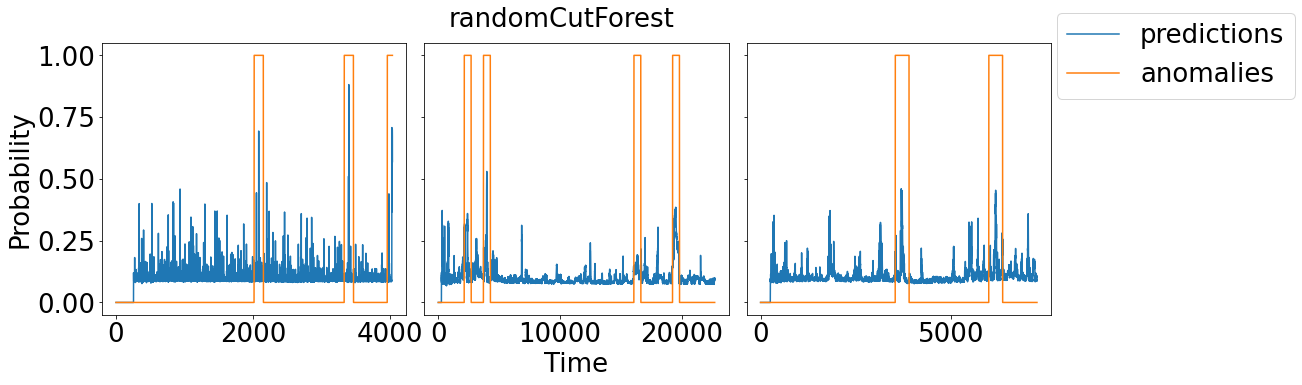

In [6]:
fig, axs = plt.subplots(1, len(files), figsize=(17, 5))
for i, _ in enumerate(files):
    axs[i].plot(
        scores_real[scores_real["file_name"] == files[i]][
            "score_randomCutForest"
        ].values,
        label="predictions",
    )
    axs[i].plot(
        scores_real[scores_real["file_name"] == files[i]]["label"].values,
        label="anomalies",
    )
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=0
)
for n, ax in enumerate(axs.flat):
    if n == 1:
        ax.set_xlabel("Time", fontsize=26)
    ax.set_ylabel("Probability", fontsize=26)
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(labelsize=26)
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels, loc="upper right", bbox_to_anchor=(1.11, 1), fontsize=26
)
fig.suptitle("randomCutForest", fontsize=26);

## Weights analysis for the real data with known anomaly causes of system failure

In [7]:
experts = [
    "knncad",
    "numentaTM",
    "twitterADVec",
    "skyline",
    "earthgeckoSkyline",
    "numenta",
    "bayesChangePt",
    "null",
    "expose",
    "relativeEntropy",
    "htmjava",
    "randomCutForest",
    "random",
    "contextOSE",
    "windowedGaussian",
]
FOLDER_NAME = "realKnownCause"
FILE_NAME = "_machine_temperature_system_failure.csv"

In [8]:
dt = read_nab(experts, FOLDER_NAME, FILE_NAME)
score_experts = np.array(dt.filter(regex="^score", axis=1))
assert score_experts.shape[1] == len(experts)
target = dt["label"].values

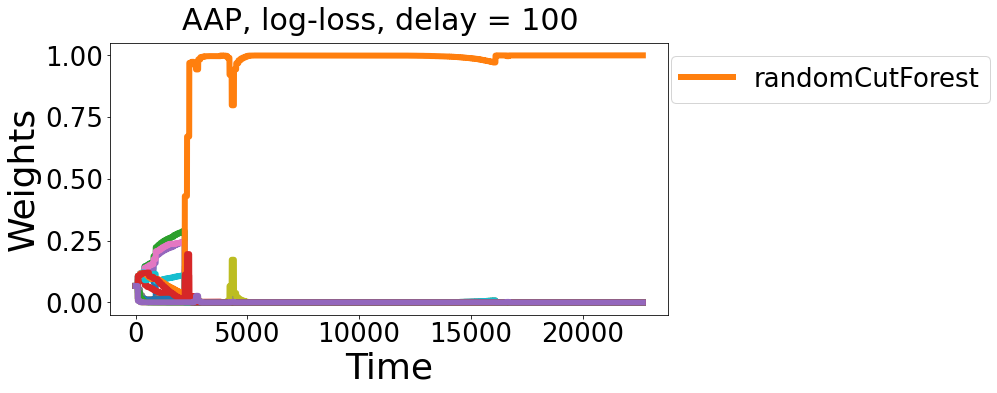

In [9]:
score_AA, loss_AA, loss_experts, weights_experts = share_delays(
    target, score_experts, share_type="Fixed", alpha=0, delays=100
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(experts):
    if max(weights_experts.T[i]) > 0.7:
        plt.plot(
            weights_experts.T[i], linewidth=6, label=f"{experts[i]}"
        )
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.6, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
plt.rcParams.update({"font.size": 36})
fig.suptitle("AAP, log-loss, delay = 100", fontsize=30);

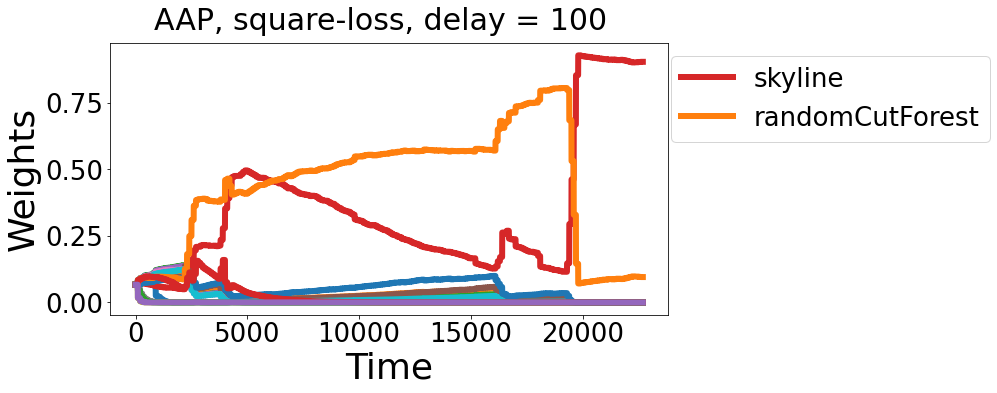

In [10]:
score_AA, loss_AA, loss_experts, weights_experts = share_delays(
    target, score_experts, share_type="Variable", alpha=0, delays=100
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(experts):
    if max(weights_experts.T[i]) > 0.7:
        plt.plot(
            weights_experts.T[i], linewidth=6, label=f"{experts[i]}"
        )
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.6, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
plt.rcParams.update({"font.size": 36})
fig.suptitle("AAP, square-loss, delay = 100", fontsize=30);

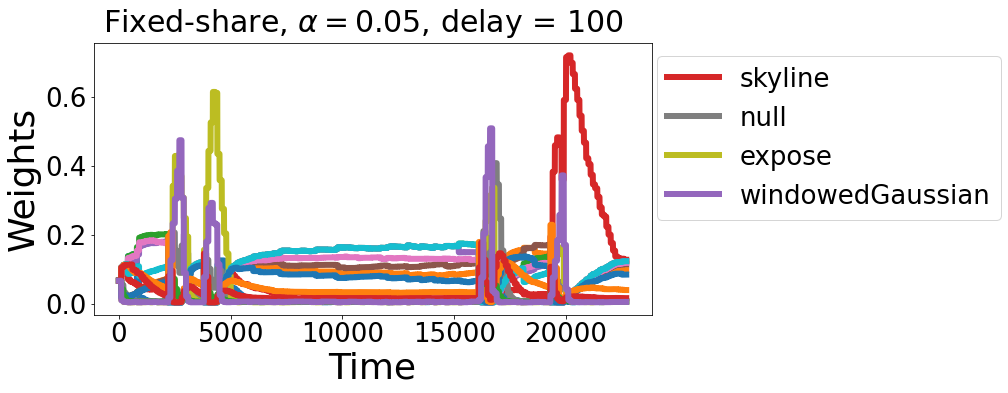

In [11]:
score_AA, loss_AA, loss_experts, weights_experts = share_delays(
    target, score_experts, share_type="Fixed", alpha=0.05, delays=100
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(experts):
    if max(weights_experts.T[i]) > 0.3:
        plt.plot(
            weights_experts.T[i], linewidth=6, label=f"{experts[i]}"
        )
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
plt.rcParams.update({"font.size": 36})
fig.suptitle(r"Fixed-share, $\alpha = 0.05$, delay = 100", fontsize=30);

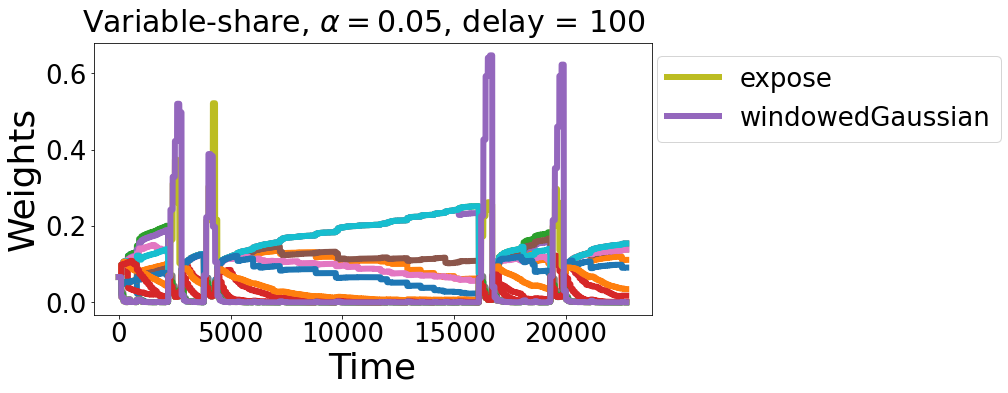

In [12]:
score_AA, loss_AA, loss_experts, weights_experts = share_delays(
    target, score_experts, share_type="Variable", alpha=0.05, delays=100
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(experts):
    if max(weights_experts.T[i]) > 0.5:
        plt.plot(
            weights_experts.T[i], linewidth=6, label=f"{experts[i]}"
        )
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
plt.rcParams.update({"font.size": 36})
fig.suptitle(r"Variable-share, $\alpha = 0.05$, delay = 100", fontsize=30);

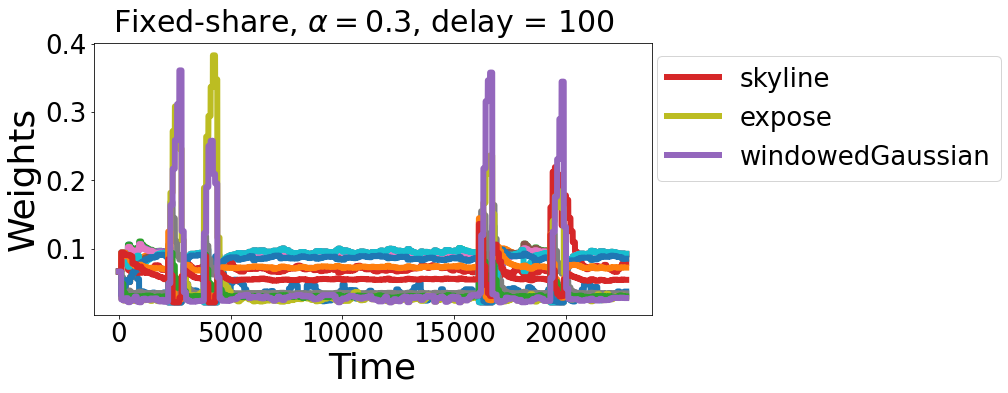

In [13]:
score_AA, loss_AA, loss_experts, weights_experts = share_delays(
    target, score_experts, share_type="Fixed", alpha=0.3, delays=100
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(experts):
    if max(weights_experts.T[i] > 0.2):
        plt.plot(
            weights_experts.T[i], linewidth=6, label=f"{experts[i]}"
        )
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
plt.rcParams.update({"font.size": 36})
fig.suptitle(r"Fixed-share, $\alpha = 0.3$, delay = 100", fontsize=30);

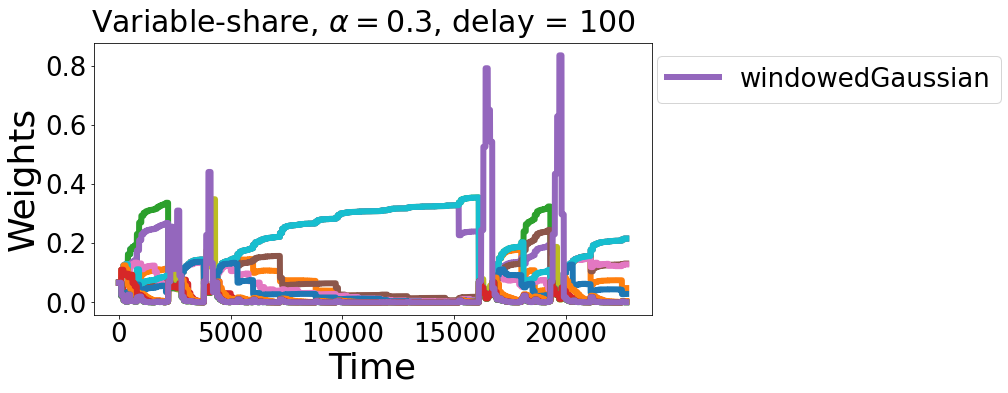

In [14]:
score_AA, loss_AA, loss_experts, weights_experts = share_delays(
    target, score_experts, share_type="Variable", alpha=0.3, delays=100
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(experts):
    if max(weights_experts.T[i] > 0.5):
        plt.plot(
            weights_experts.T[i], linewidth=6, label=f"{experts[i]}"
        )
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
plt.rcParams.update({"font.size": 36})
fig.suptitle(r"Variable-share, $\alpha = 0.3$, delay = 100", fontsize=30);

## Plot theoretical bounds 

In [15]:
losses_log_art = (
    losses_log[
        (losses_log["folder_name"] == "artificialNoAnomaly")
        & (losses_log["file_name"] == "_art_daily_perfect_square_wave.csv")
    ]
    .filter(regex="^loss", axis=1)
    .reset_index()
    .drop("index", axis=1)
)
losses_square_art = (
    losses_square[
        (losses_square["folder_name"] == "artificialNoAnomaly")
        & (losses_square["file_name"] == "_art_daily_perfect_square_wave.csv")
    ]
    .filter(regex="^loss", axis=1)
    .reset_index()
    .drop("index", axis=1)
)

### Log-loss

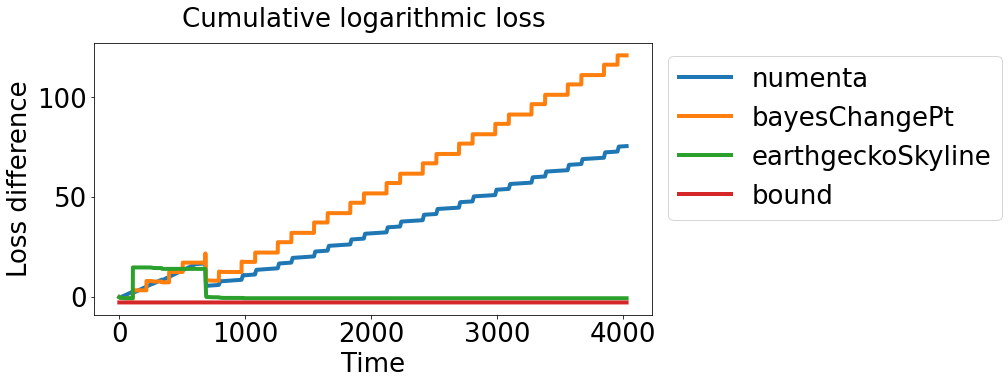

In [16]:
ETA = 1
Losses_log_avg = calc_cum_avg_loss(losses_log_art, current_delay=1)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for algo_ind in ["numenta", "bayesChangePt", "earthgeckoSkyline"]:
    axs.plot(
        Losses_log_avg[f"loss_{algo_ind}"] - Losses_log_avg["loss_Fixed0d0"],
        label=f"{algo_ind}",
        linewidth=4,
    )
axs.plot(
    np.repeat(-np.log(len(experts)) / ETA, Losses_log_avg.shape[0]),
    linewidth=4,
    label="bound",
)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=26)
axs.set_ylabel("Loss difference", fontsize=26)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
fig.suptitle("Cumulative logarithmic loss", fontsize=26);

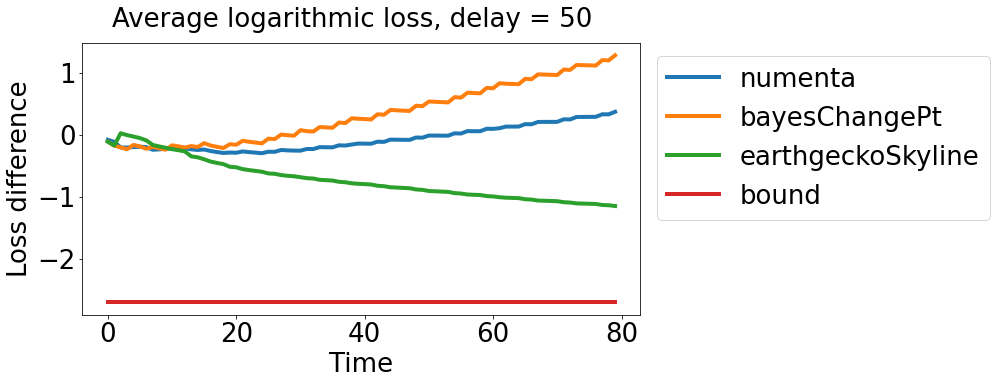

In [17]:
ETA = 1
Losses_log_avg = calc_cum_avg_loss(losses_log_art, current_delay=50)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for algo_ind in ["numenta", "bayesChangePt", "earthgeckoSkyline"]:
    axs.plot(
        Losses_log_avg[f"loss_{algo_ind}"] - Losses_log_avg["loss_Fixed0d2"],
        label=f"{algo_ind}",
        linewidth=4,
    )
axs.plot(
    np.repeat(-np.log(len(experts)) / ETA, Losses_log_avg.shape[0]),
    linewidth=4,
    label="bound",
)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=26)
axs.set_ylabel("Loss difference", fontsize=26)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
fig.suptitle("Average logarithmic loss, delay = 50", fontsize=26);

### Square-loss

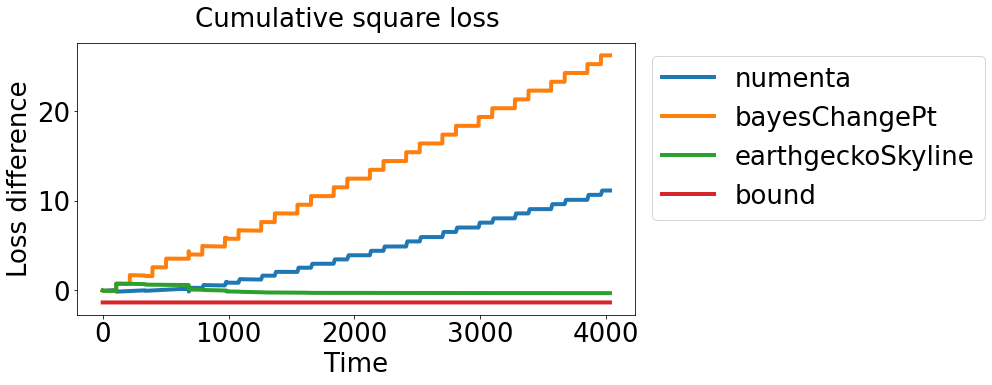

In [18]:
ETA = 2
Losses_square_avg = calc_cum_avg_loss(losses_square_art, current_delay=1)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for algo_ind in ["numenta", "bayesChangePt", "earthgeckoSkyline"]:
    axs.plot(
        Losses_square_avg[f"loss_{algo_ind}"]
        - Losses_square_avg["loss_Variable0d0"],
        label=f"{algo_ind}",
        linewidth=4,
    )
axs.plot(
    np.repeat(-np.log(len(experts)) / ETA, Losses_square_avg.shape[0]),
    linewidth=4,
    label="bound",
)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=26)
axs.set_ylabel("Loss difference", fontsize=26)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
fig.suptitle("Cumulative square loss", fontsize=26);

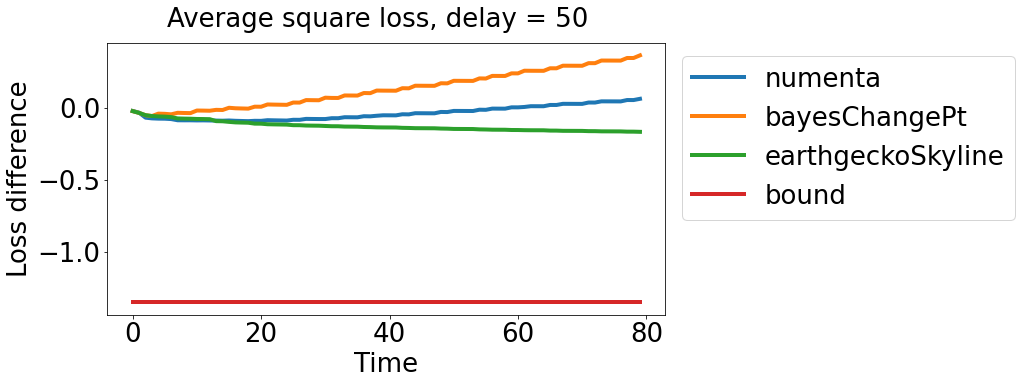

In [19]:
ETA = 2
Losses_square_avg = calc_cum_avg_loss(losses_square_art, current_delay=50)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for algo_ind in ["numenta", "bayesChangePt", "earthgeckoSkyline"]:
    axs.plot(
        Losses_square_avg[f"loss_{algo_ind}"]
        - Losses_square_avg["loss_Variable0d2"],
        label=f"{algo_ind}",
        linewidth=4,
    )
axs.plot(
    np.repeat(-np.log(len(experts)) / ETA, Losses_square_avg.shape[0]),
    linewidth=4,
    label="bound",
)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=26)
axs.set_ylabel("Loss difference", fontsize=26)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
fig.suptitle("Average square loss, delay = 50", fontsize=26);